# 모두의 딥러닝 20_GAN

https://github.com/gilbutITbook/080228/blob/master/deeplearning/run_project/20_GAN.ipynb

In [1]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import librosa
import librosa.display
import soundfile as sf


In [2]:
#이미지가 저장될 폴더가 없다면 만듭니다.
# import os
# if not os.path.exists("E:\\nmb\\gan_images"):
#     os.makedirs("E:\\nmb\\gan_image")

np.random.seed(3)
tf.random.set_seed(3)

nosie_size = 100
x_size = 32
y_size = 128
gx1 = int(x_size/4)
gy1 = int(y_size/4)

epochs = 300001
batch = 16

In [3]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*gx1*gy1, input_dim=nosie_size, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((gx1, gy1, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32768)             3309568   
_________________________________________________________________
batch_normalization (BatchNo (None, 32768)             131072    
_________________________________________________________________
reshape (Reshape)            (None, 8, 32, 128)        0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 64, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 16, 64, 64)        0

In [4]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(x_size,y_size,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
# discriminator.trainable = False
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 64, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 32, 128)        204928    
_________________________________________________________________
activation_2 (Activation)    (None, 8, 32, 128)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 32, 128)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)            

In [5]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
discriminator.trainable = False
ginput = Input(shape=(nosie_size,))                    
dis_output = discriminator(generator(ginput))         
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 32, 128, 1)        3647361   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 239361    
Total params: 3,886,722
Trainable params: 3,581,697
Non-trainable params: 305,025
_________________________________________________________________


In [6]:
# X_train = np.load('E:\\nmb\\nmb_data\\npy\\1m2s\\concate\\total_fm_data.npy')
X_train = np.load('C:\\nmb\\nmb_data\\npy\\total_f_data.npy')
print(X_train.shape)    # (2331, 128, 862)

x_train= []
for i in range (X_train.shape[0]) : 
    print(X_train[i].shape)
    img_resize = cv2.resize(X_train[i], (x_size, y_size))
    print(img_resize.shape)
    x_train.append(img_resize)
    
x_train = np.array(x_train)
x_train.shape    # (2331, 128, 32)


28, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128, 862)
(128, 32)
(128,

(2331, 128, 32)

In [11]:
from datetime import datetime
start = datetime.now()

#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):
  
  global nosie_size, x_size, y_size


  # 데이터 불러오기
  print(x_train.shape)  # (2331, 128, 32)
  X_train = x_train.reshape(x_train.shape[0], x_size*y_size).astype('float32')
  print(np.max(X_train), np.min(X_train))   # -0.00016182661 -80.0

  scale = MaxAbsScaler()
    #   절대값이 0~1사이에 매핑
    #   -1 ~ 1 사이로 재조정
  X_train = scale.fit_transform(X_train)
  print(X_train.shape)   # (2331, 4096)
  print(np.max(X_train), np.min(X_train))   # -2.0228326e-06 -1.0


  X_train = X_train.reshape(x_train.shape[0], x_size, y_size, 1).astype('float32')
  print(X_train.shape)  # (2331, 32, 128, 1)

  true = np.ones((batch_size, 1))   # 1로 라벨링
    # print(true.shape)     # (32, 1)
    # print(true)
  fake = np.zeros((batch_size, 1))  # 0으로 라벨링
    # print(fake.shape)     # (32, 1)
    # print(fake)

  d_loss_list = list()
  g_loss_list = list()

  for i in range(epoch):
        # [1] 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)    
            # 0부터 X_train.shape[0] 까지 batch_size개의 랜덤 값(정수형)을 반환한다.
            # print(idx.shape)        # (32,) == (batch_size, )
            # print(idx)
        imgs = X_train[idx]
            # print(imgs.shape)   # (32, 56, 56, 1)
            # print(imgs)

            # 실제 데이터 이미지 확인하기
            # imgs = np.array(imgs[0])
            # imgs = np.reshape(imgs,(128, 173))
            # print(imgs.shape)         # (128, 173)
            # plt.imshow(imgs,'gray')
            # plt.show()

            # batch_size : 한 에폭당 생성되는 이미지의 개수

        d_loss_real = discriminator.train_on_batch(imgs, true)
            # train_on_batch : fit() 과 유사한 기능을 함
            # fit()과 차이점 : 고정된 batch_size에 신경쓰지 않는다. 
            # generator는 매번 새로운 image를 전달해야 하기 때문에 새로운 데이터를 학습해야 한다.
            # 현재 전달받은 데이터를 활용해서 가중치를 계산한다.

       # [2] 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, nosie_size))   
            # 평균이 0, 분산이 1인 표준 정규분포, 랜덤한 값을 반환해준다.
            # (batch_size, 100) 행렬로 반환
            # print(noise.shape)  # (32, 100)
            # print(noise)
        gen_imgs = generator.predict(noise)
            # print(gen_imgs.shape)     # (32, 56, 56, 1)
            # print(gen_imgs)

            # 실제 데이터 이미지 확인하기
            # gen_imgs = np.array(gen_imgs[0])
            # gen_imgs = np.reshape(gen_imgs,(28, 28))
            # print(gen_imgs.shape)           # (28, 28)
            # plt.imshow(gen_imgs,'gray')
            # plt.show()
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        #판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # 판별자 loss
        g_loss = gan.train_on_batch(noise, fake)        # 생성자 loss => true(1) 대신 fake(0) @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # loss 값 저장하기
        d_loss_list.append(float(d_loss))
        g_loss_list.append(float(g_loss))

        # pandas dataframe
        d_loss_df = pd.DataFrame(d_loss_list)
        g_loss_df = pd.DataFrame(g_loss_list)

        d_loss_df.columns = ['d_loss']
        g_loss_df.columns = ['g_loss']

        gd_loss_df = pd.concat([d_loss_df, g_loss_df], axis = 1)

        gd_loss_df.to_csv('C:\\nmb\\nmb_data\\gan_image\\csv\\dcgan_fake.csv', index = False)

        if i % saving_interval == 0:
            # saving_interval 마다 이미지를 출력한다.
            noise = np.random.normal(0, 1, (25, nosie_size))
                # print(noise.shape)  # (25, 100)
            gen_imgs = generator.predict(noise)
                # print(gen_imgs.shape)   # (25, 28, 28, 1)
            # idx2 = np.random.randint(0, gen_imgs.shape[0])
            idx2 = 5    # 출력 값 고정
            print("id2 > ", idx2)
            
            gen_imgs = 0.5 * gen_imgs + 0.5
                # Rescale images 0 - 1
            print(gen_imgs.shape) # (25, 32, 128, 1)
       
            # 다시 melspectrogram으로 바꾸기 (shape 맞추기)
            gen_mels = cv2.resize(gen_imgs[idx2], (862,128))
            # gen_mels = cv2.resize(gen_imgs[idx2], (128, 862))
            # print(gen_mels.shape) # (862, 128)
            # gen_mels = gen_mels.reshape(gen_mels.shape[1], gen_mels.shape[0] )
            print(gen_mels.shape) # (128, 862)

            # 다시 melspectrogram으로 바꾸기
            remels = librosa.feature.inverse.mel_to_audio (gen_mels, sr=22050, hop_length=128, n_fft=512)
            print(remels.shape)   # (110208,)

            sf.write(f'C:\\nmb\\nmb_data\\gan_image\\fake\\{i}.wav', remels, 22050)

            # librosa.display.waveplot(remels, 22050)
            # plt.show()
            print("end")
            

gan_train(epochs, batch, 500)


end = datetime.now()
time = end - start
print("작업 시간 : " , time)  

0000  g_loss:0.0000
epoch:593  d_loss:0.0000  g_loss:0.0000
epoch:594  d_loss:0.0000  g_loss:0.0000
epoch:595  d_loss:0.0000  g_loss:0.0000
epoch:596  d_loss:0.0000  g_loss:0.0000
epoch:597  d_loss:0.0000  g_loss:0.0000
epoch:598  d_loss:0.0000  g_loss:0.0000
epoch:599  d_loss:0.0000  g_loss:0.0000
epoch:600  d_loss:0.0000  g_loss:0.0000
epoch:601  d_loss:0.0000  g_loss:0.0000
epoch:602  d_loss:0.0000  g_loss:0.0000
epoch:603  d_loss:0.0000  g_loss:0.0000
epoch:604  d_loss:0.0000  g_loss:0.0000
epoch:605  d_loss:0.0000  g_loss:0.0000
epoch:606  d_loss:0.0000  g_loss:0.0000
epoch:607  d_loss:0.0000  g_loss:0.0000
epoch:608  d_loss:0.0000  g_loss:0.0000
epoch:609  d_loss:0.0000  g_loss:0.0000
epoch:610  d_loss:0.0000  g_loss:0.0000
epoch:611  d_loss:0.0000  g_loss:0.0000
epoch:612  d_loss:0.0000  g_loss:0.0000
epoch:613  d_loss:0.0000  g_loss:0.0000
epoch:614  d_loss:0.0000  g_loss:0.0000
epoch:615  d_loss:0.0000  g_loss:0.0000
epoch:616  d_loss:0.0000  g_loss:0.0000
epoch:617  d_loss:0.

KeyboardInterrupt: 

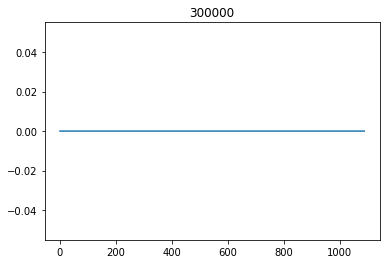

In [12]:
loss_csv = pd.read_csv('C:\\nmb\\nmb_data\\gan_image\\csv\\dcgan_fake.csv')
# print(loss_csv)
# print(loss_csv.shape)
 
# generator loss
plt.plot(loss_csv['g_loss'])

plt.title(epochs-1)
plt.show()

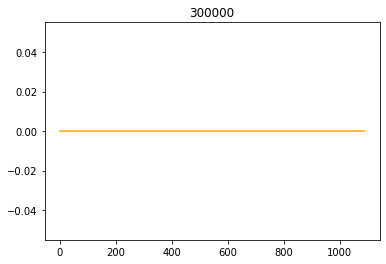

In [13]:
# discriminator loss
plt.plot(loss_csv['d_loss'], color='orange')

plt.title(epochs-1)
plt.show()